In [566]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [1330]:
lend = pd.read_csv("loan.csv")
# lend.to_csv("loan.csv")

In [1331]:
# lend.drop('Unnamed: 0', axis=1, inplace=True)
lend.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries
0,2500,2500,60 months,15.27%,59.83,C,Ryder,0 yrs,RENT,30000.0,...,309xx,GA,1.00,0,3,0,1687,9.40%,4,117.08
1,10000,10000,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ yrs,RENT,49200.0,...,917xx,CA,20.00,0,10,0,5598,21%,37,0.00
2,5000,5000,36 months,7.90%,156.46,A,Veolia Transportaton,3 yrs,RENT,36000.0,...,852xx,AZ,11.20,0,9,0,7963,28.30%,12,0.00
3,7000,7000,60 months,15.96%,170.08,C,Southern Star Photography,8 yrs,RENT,47004.0,...,280xx,NC,23.51,0,7,0,17726,85.60%,11,0.00
4,3000,3000,36 months,18.64%,109.43,E,MKC Accounting,9 yrs,RENT,48000.0,...,900xx,CA,5.35,0,4,0,8221,87.50%,4,0.00


In [1332]:
missing_values = lend.isnull().sum()
missing_values

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
emp_title               0
emp_length             55
home_ownership          0
annual_inc              0
verification_status     0
issue_mon               0
issue_yr                0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util             46
total_acc               0
recoveries              0
dtype: int64

In [1333]:
## Drop null values from emp_length
lend.drop('funded_amnt', axis=1, inplace=True)

In [1334]:
lend.drop(lend[lend['emp_length'].isna()].index, inplace=True)
lend.drop(lend[lend['revol_util'].isna()].index, inplace=True)

In [1335]:
lend.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_mon', 'issue_yr', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'recoveries'],
      dtype='object')

In [1336]:
lend.reset_index(drop=True, inplace=True) # Reset index after datacleaning
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36090 entries, 0 to 36089
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36090 non-null  int64  
 1   term                 36090 non-null  object 
 2   int_rate             36090 non-null  object 
 3   installment          36090 non-null  float64
 4   grade                36090 non-null  object 
 5   emp_title            36090 non-null  object 
 6   emp_length           36090 non-null  object 
 7   home_ownership       36090 non-null  object 
 8   annual_inc           36090 non-null  float64
 9   verification_status  36090 non-null  object 
 10  issue_mon            36090 non-null  int64  
 11  issue_yr             36090 non-null  int64  
 12  loan_status          36090 non-null  object 
 13  purpose              36090 non-null  object 
 14  zip_code             36090 non-null  object 
 15  addr_state           36090 non-null 

In [1337]:
lend.shape

(36090, 24)

In [1338]:
## Converted Mon-Yr string value in issue_d to issue_mon and issue_yr columns ##
# lend['issue_d'] = pd.to_datetime(lend['issue_d'], format='%b-%y')
# lend['issue_mon'] = pd.DatetimeIndex(lend['issue_d']).month
# lend['issue_yr'] = pd.DatetimeIndex(lend['issue_d']).year

In [1339]:
## Remove % sign and convert int_rate to float
lend['int_rate'] = lend['int_rate'].str.replace("%", "")
lend['int_rate'] = lend['int_rate'].astype('float')

In [1340]:
lend['annual_inc'] = lend['annual_inc'].astype('int')

In [1341]:
lend.loc[lend['home_ownership'] == 'NONE', 'home_ownership'] = 'RENT'

In [1342]:
lend.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries
0,2500,60 months,15.27,59.83,C,Ryder,0 yrs,RENT,30000,Source Verified,...,309xx,GA,1.0,0,3,0,1687,9.40%,4,117.08
1,10000,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ yrs,RENT,49200,Source Verified,...,917xx,CA,20.0,0,10,0,5598,21%,37,0.00
2,5000,36 months,7.90,156.46,A,Veolia Transportaton,3 yrs,RENT,36000,Source Verified,...,852xx,AZ,11.2,0,9,0,7963,28.30%,12,0.00


In [1343]:
uniq_vals = lambda cols: df[cols].unique()
desc_col = lambda cols: df[cols].describe()
col_info = lambda cols: df[cols].info()


#Find Frequency of unique values
def find_freq(cols):
    outDF = pd.DataFrame(data = {cols: df[cols].value_counts().index, 
                                       'Freq': list(round(df[cols].value_counts())), 
                                       "Freq_%": list(round(df[cols].value_counts(normalize=True)*100, 2))})
    outDF.index = outDF.index+1
    return outDF


#Find Quartiles information
def QuartileFind(cols):
    q25 = round(df[cols].quantile(.25), 2)
    q75 = round(df[cols].quantile(.75), 2)
    
    print(f'25th quartile = {q25}')
    print(f'75th quartile = {q75}')
    print(f'IQR is {q75-q25}')
    
    return desc_col(cols)

In [1394]:
# lend.to_csv("loan.csv")

In [1345]:
#########
## the company wants to understand the driving factors (or driver variables) behind loan default, 
## i.e. the variables which are strong indicators of default.  
## The company can utilise this knowledge for its portfolio and risk assessment.
#
# Loan dataset for Lending club customers
# Dataset is month-wise from June-2007 till Dec-2011
# Number of Rows x columns ==> 36191 x 25

In [1346]:
lend.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_mon,issue_yr,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,recoveries
count,36090.000000,36090.000000,36090.000000,3.609000e+04,36090.000000,36090.000000,36090.00000,36090.000000,36090.000000,36090.000000,36090.000000,36090.000000,36090.000000
mean,11110.869354,11.964021,324.009127,6.906147e+04,7.108728,2010.305874,13.35807,0.147492,9.330147,0.053838,13365.177695,22.146079,96.483479
std,7312.842413,3.683625,207.248954,6.461655e+04,3.398029,0.883443,6.64532,0.495089,4.393421,0.235081,15723.893961,11.408887,694.346745
min,500.000000,5.420000,16.080000,4.000000e+03,1.000000,2007.000000,0.00000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,8.940000,167.730000,4.100400e+04,4.000000,2010.000000,8.26000,0.000000,6.000000,0.000000,3756.000000,14.000000,0.000000
50%,10000.000000,11.830000,280.620000,6.000000e+04,7.000000,2011.000000,13.47000,0.000000,9.000000,0.000000,8911.500000,20.000000,0.000000
75%,15000.000000,14.420000,426.680000,8.213400e+04,10.000000,2011.000000,18.61000,0.000000,12.000000,0.000000,17050.750000,29.000000,0.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,12.000000,2011.000000,29.99000,11.000000,44.000000,4.000000,149588.000000,90.000000,29623.350000


In [1347]:
lend.describe(include='O')

,term,grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,revol_util
count,36090,36090,36090,36090,36090,36090,36090,36090,36090,36090,36090
unique,2,7,27748,11,5,3,2,14,817,50,1081
top,36 months,B,US Army,10+ yrs,RENT,Not Verified,Fully Paid,debt_consolidation,100xx,CA,0%
freq,27082,10931,133,8155,17476,15526,30974,17220,550,6492,863


In [1348]:
## Almost 90 % of the data is 0, so these columns cannot contribute to analysis
lend.drop(['delinq_2yrs', 'pub_rec', 'recoveries'], axis=1, inplace=True)

##### Loan Amount

In [1349]:
q1 = lend['loan_amnt'].quantile(.1)
q3 = lend['loan_amnt'].quantile(.8)
print(f'Q1 is {q1}, Q3 is {q3}')

Q1 is 3200.0, Q3 is 16000.0


In [1350]:
IQR = q3-q1
IQR

12800.0

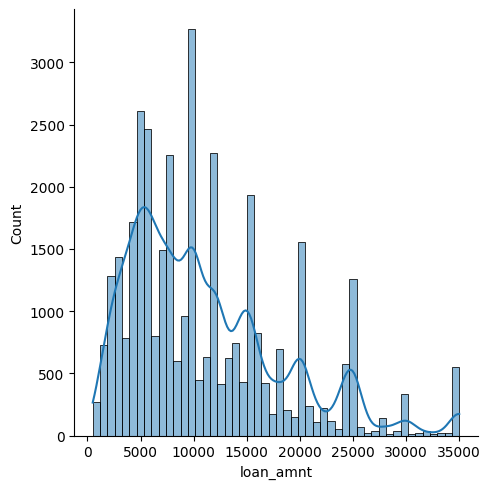

In [1351]:
sns.displot(lend['loan_amnt'], bins=50, kde=True)
plt.show()

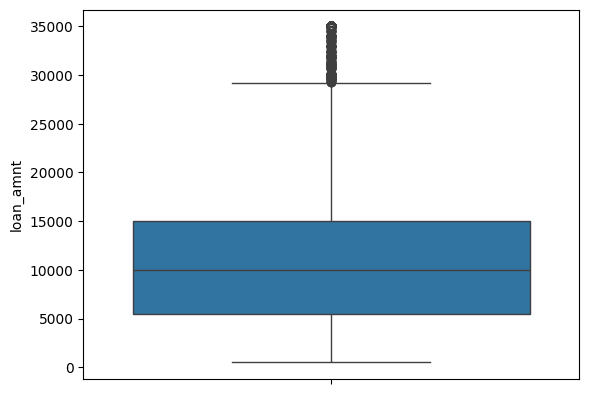

In [1352]:
sns.boxplot(lend['loan_amnt'])
plt.show()

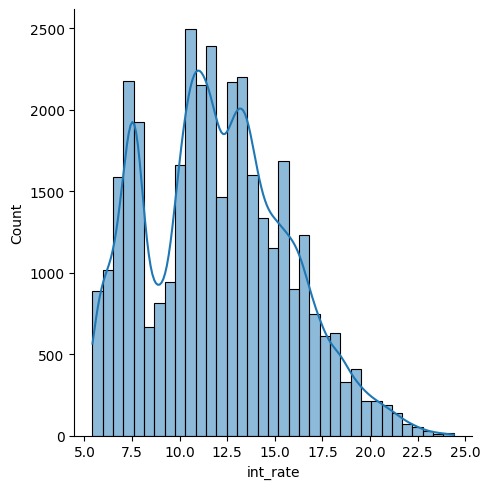

In [1353]:
sns.displot(lend['int_rate'], bins=35, kde=True)
plt.show()

In [1354]:
lend['int_rate'].unique

<bound method Series.unique of 0        15.27
1        13.49
2         7.90
3        15.96
4        18.64
         ...  
36085     7.43
36086     8.70
36087     8.07
36088    10.28
36089    13.75
Name: int_rate, Length: 36090, dtype: float64>

##### 'term'  Loan-Term

In [1355]:
lend['term'].unique()

array(['60 months', '36 months'], dtype=object)

In [1356]:
lend['term'].value_counts()

term
36 months    27082
60 months     9008
Name: count, dtype: int64

In [1357]:
100 * lend['term'].value_counts(normalize=True)

term
36 months    75.040177
60 months    24.959823
Name: proportion, dtype: float64

#####  'grade'  Grade

In [1358]:
100 * lend['grade'].value_counts(normalize=True)

grade
B    30.288168
A    25.683015
C    20.443336
D    13.264062
E     6.988085
F     2.540870
G     0.792463
Name: proportion, dtype: float64

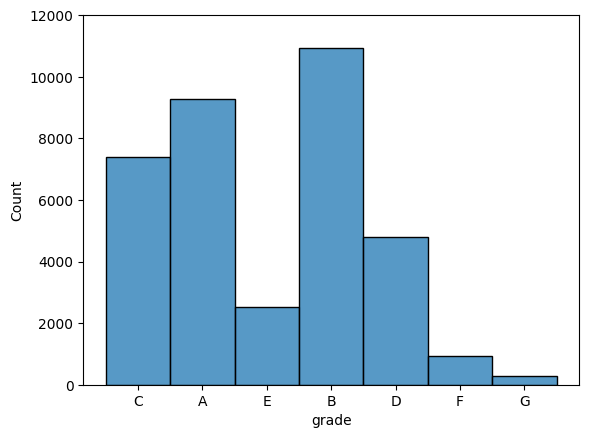

In [1359]:
sns.histplot(lend['grade'])
plt.yticks(ticks=np.arange(0, 13000, 2000), labels=np.arange(0, 13000, 2000))
# plt.grid()
plt.show()

##### Employment Length

In [1360]:
lend['emp_length'].unique()

array(['0 yrs', '10+ yrs', '3 yrs', '8 yrs', '9 yrs', '5 yrs', '4 yrs',
       '1 yrs', '6 yrs', '2 yrs', '7 yrs'], dtype=object)

In [1361]:
100 * lend['emp_length'].value_counts(normalize=True)

emp_length
10+ yrs    22.596287
2 yrs      11.562760
0 yrs      11.404821
3 yrs      10.798005
4 yrs       9.030202
5 yrs       8.553616
1 yrs       8.481574
6 yrs       5.807703
7 yrs       4.599612
8 yrs       3.848712
9 yrs       3.316708
Name: proportion, dtype: float64

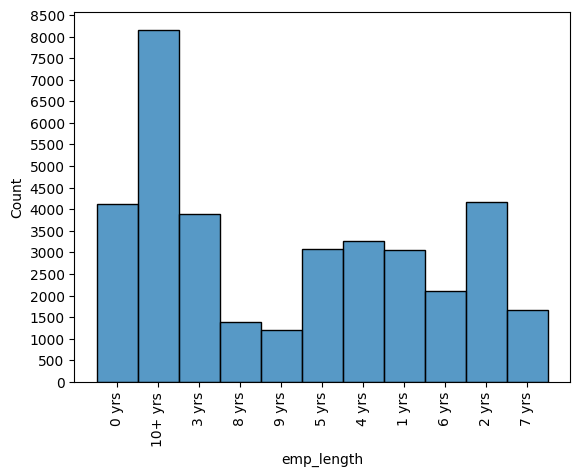

In [1362]:
sns.histplot(lend['emp_length'])
plt.yticks(ticks=np.arange(0, 9000, 500), labels=np.arange(0, 9000, 500))
plt.xticks(rotation=90)
# plt.grid()
plt.show()

In [1363]:
lend.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_mon,issue_yr,dti,open_acc,revol_bal,total_acc
count,36090.000000,36090.000000,36090.000000,3.609000e+04,36090.000000,36090.000000,36090.00000,36090.000000,36090.000000,36090.000000
mean,11110.869354,11.964021,324.009127,6.906147e+04,7.108728,2010.305874,13.35807,9.330147,13365.177695,22.146079
std,7312.842413,3.683625,207.248954,6.461655e+04,3.398029,0.883443,6.64532,4.393421,15723.893961,11.408887
min,500.000000,5.420000,16.080000,4.000000e+03,1.000000,2007.000000,0.00000,2.000000,0.000000,2.000000
25%,5500.000000,8.940000,167.730000,4.100400e+04,4.000000,2010.000000,8.26000,6.000000,3756.000000,14.000000
50%,10000.000000,11.830000,280.620000,6.000000e+04,7.000000,2011.000000,13.47000,9.000000,8911.500000,20.000000
75%,15000.000000,14.420000,426.680000,8.213400e+04,10.000000,2011.000000,18.61000,12.000000,17050.750000,29.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,12.000000,2011.000000,29.99000,44.000000,149588.000000,90.000000


In [1364]:
lend.describe(include='O')

,term,grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,revol_util
count,36090,36090,36090,36090,36090,36090,36090,36090,36090,36090,36090
unique,2,7,27748,11,5,3,2,14,817,50,1081
top,36 months,B,US Army,10+ yrs,RENT,Not Verified,Fully Paid,debt_consolidation,100xx,CA,0%
freq,27082,10931,133,8155,17476,15526,30974,17220,550,6492,863


##### against Loan Amount

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

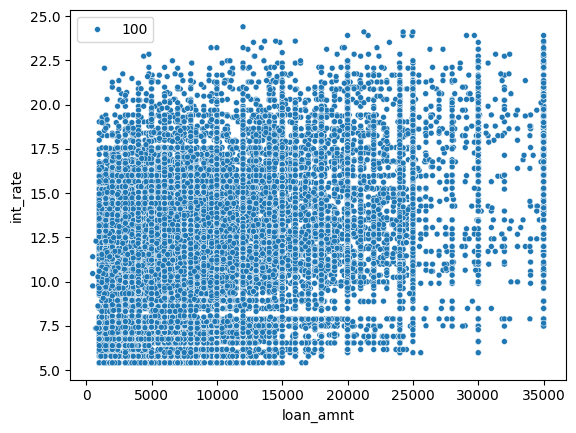

In [1365]:
sns.scatterplot(lend.loc[lend['annual_inc'] < 200000,:], x='loan_amnt', y='int_rate', size=100)

<Axes: xlabel='loan_amnt', ylabel='annual_inc'>

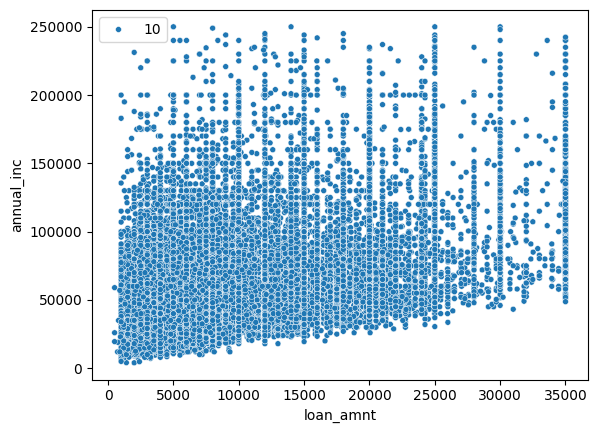

In [1366]:
sns.scatterplot(lend.loc[lend['annual_inc'] < 250000,:], x='loan_amnt', y='annual_inc', size=10)

<Axes: xlabel='int_rate', ylabel='annual_inc'>

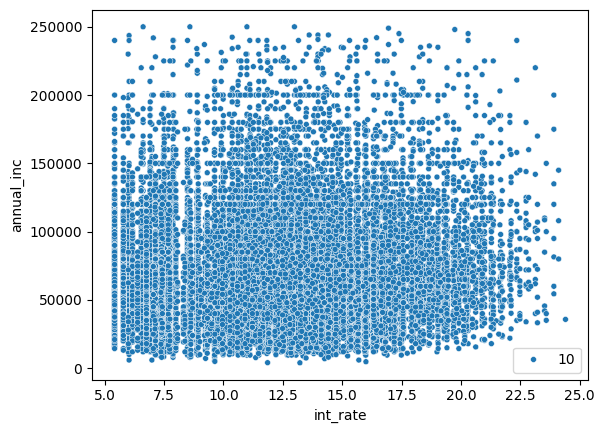

In [1367]:
sns.scatterplot(lend.loc[lend['annual_inc'] < 250000,:], x='int_rate', y='annual_inc', size=10)

In [1368]:
# Outliers

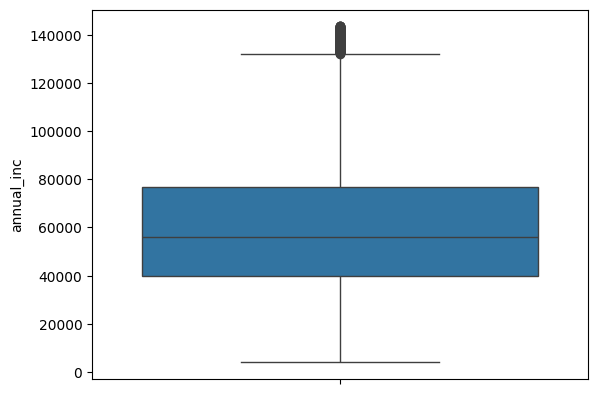

In [1369]:
sns.boxplot(lend_bounded['annual_inc'])
plt.show()

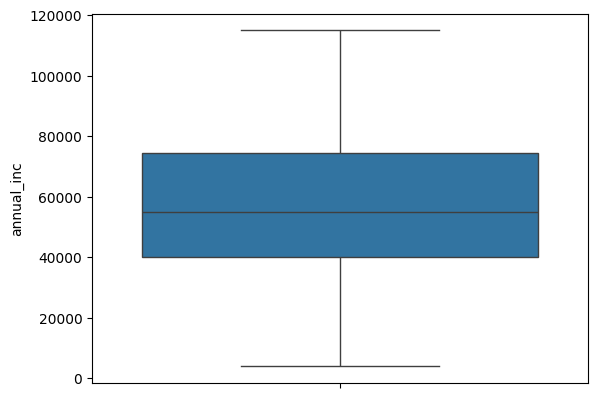

In [1370]:
sns.boxplot(cs_1090['annual_inc'])
plt.show()

In [1374]:
## Loan Amount Bounds
lq1 = lend['annual_inc'].quantile(.25)
lq3 = lend['annual_inc'].quantile(.75)
print(f'Q1 is {lq1} || Q3 is {lq3}')

Q1 is 41004.0 || Q3 is 82134.0


In [1375]:
lIQR = lq3-lq1
lIQR

41130.0

In [1376]:
uboundl = lq3 + 1.5*lIQR
lboundl = 1.5*lIQR - lq1
print(f'ubound = {uboundl} || lbound = {lboundl}')

ubound = 143829.0 || lbound = 20691.0


In [1377]:
lend_bounded = lend.loc[lend['annual_inc'] <= uboundl, :]

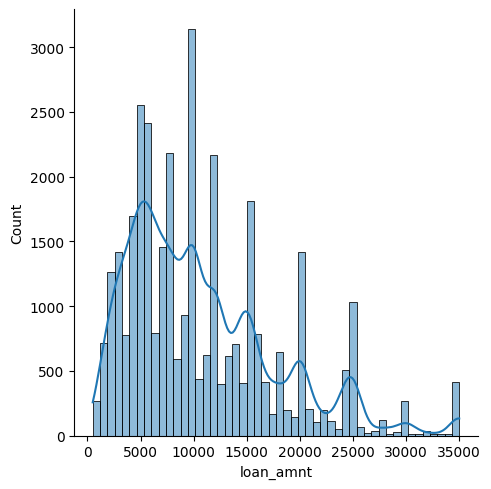

In [1378]:
sns.displot(lend_bounded['loan_amnt'], bins=50, kde=True)
plt.show()

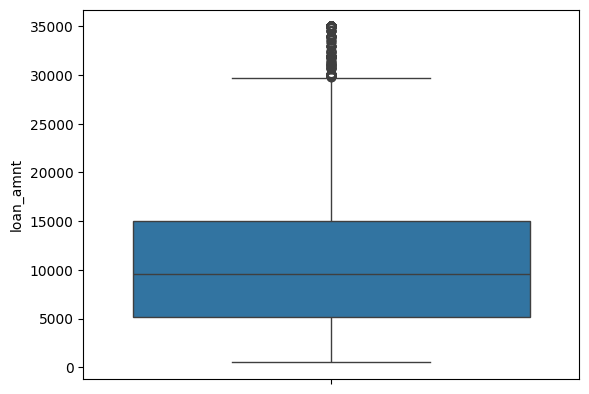

In [1379]:
sns.boxplot(lend_bounded['loan_amnt'])
plt.show()

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

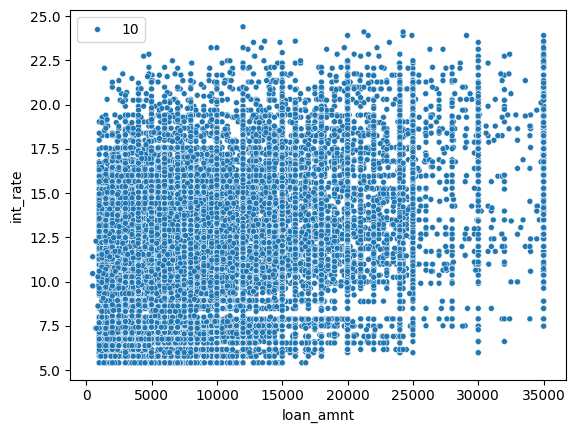

In [1383]:
sns.scatterplot(lend_bounded, x='loan_amnt', y='int_rate', size=10)

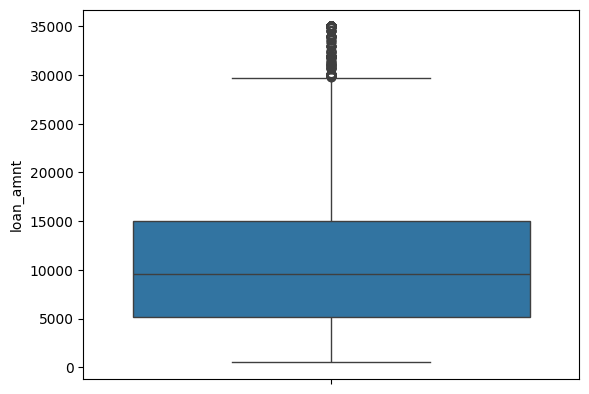

In [1385]:
sns.boxplot(lend_bounded['loan_amnt'])
plt.show()

In [1384]:
lend_bounded.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_mon,issue_yr,dti,open_acc,revol_bal,total_acc
count,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000
mean,10779.368424,11.920439,314.490892,61540.050747,7.104865,2010.304569,13.520568,9.225368,12439.789426,21.749433
std,7043.015589,3.659237,198.990669,27676.507278,3.401709,0.882147,6.634390,4.344437,13726.023136,11.224308
min,500.000000,5.420000,16.080000,4000.000000,1.000000,2007.000000,0.000000,2.000000,0.000000,2.000000
25%,5200.000000,8.940000,165.070000,40000.000000,4.000000,2010.000000,8.460000,6.000000,3652.500000,13.000000
50%,9600.000000,11.710000,273.920000,57000.000000,7.000000,2011.000000,13.670000,9.000000,8665.000000,20.000000
75%,15000.000000,14.350000,411.420000,78000.000000,10.000000,2011.000000,18.770000,12.000000,16320.750000,28.000000
max,35000.000000,24.400000,1305.190000,143500.000000,12.000000,2011.000000,29.990000,44.000000,149000.000000,90.000000


In [1038]:
## Large annual income is skewing the analysis, so outliers based on income are removed with little effect on analysis

#### Analysis

In [1062]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34406 entries, 0 to 36089
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34406 non-null  int64  
 1   term                 34406 non-null  object 
 2   int_rate             34406 non-null  float64
 3   installment          34406 non-null  float64
 4   grade                34406 non-null  object 
 5   emp_title            34406 non-null  object 
 6   emp_length           34406 non-null  object 
 7   home_ownership       34406 non-null  object 
 8   annual_inc           34406 non-null  float64
 9   verification_status  34406 non-null  object 
 10  issue_mon            34406 non-null  int64  
 11  issue_yr             34406 non-null  int64  
 12  loan_status          34406 non-null  object 
 13  purpose              34406 non-null  object 
 14  zip_code             34406 non-null  object 
 15  addr_state           34406 non-null  obje

In [1502]:
lend.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_mon,issue_yr,dti,open_acc,revol_bal,total_acc
count,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000,34406.000000
mean,10779.368424,11.920439,314.490892,61540.050747,7.104865,2010.304569,13.520568,9.225368,12439.789426,21.749433
std,7043.015589,3.659237,198.990669,27676.507278,3.401709,0.882147,6.634390,4.344437,13726.023136,11.224308
min,500.000000,5.420000,16.080000,4000.000000,1.000000,2007.000000,0.000000,2.000000,0.000000,2.000000
25%,5200.000000,8.940000,165.070000,40000.000000,4.000000,2010.000000,8.460000,6.000000,3652.500000,13.000000
50%,9600.000000,11.710000,273.920000,57000.000000,7.000000,2011.000000,13.670000,9.000000,8665.000000,20.000000
75%,15000.000000,14.350000,411.420000,78000.000000,10.000000,2011.000000,18.770000,12.000000,16320.750000,28.000000
max,35000.000000,24.400000,1305.190000,143500.000000,12.000000,2011.000000,29.990000,44.000000,149000.000000,90.000000


### Loan Amount

In [1063]:
lend['loan_amnt'].describe()

count    34406.000000
mean     10779.368424
std       7043.015589
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [1064]:
lend['loan_amnt'].unique().size

842

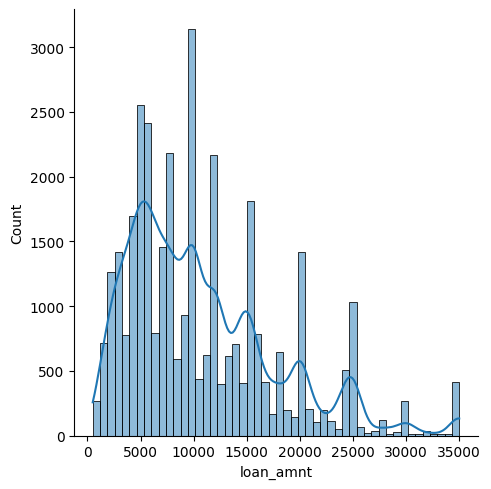

In [1073]:
sns.displot(lend['loan_amnt'], bins=50, kde=True)
plt.show()

In [1075]:
lend['loan_amnt'].mode()

0    10000
Name: loan_amnt, dtype: int64

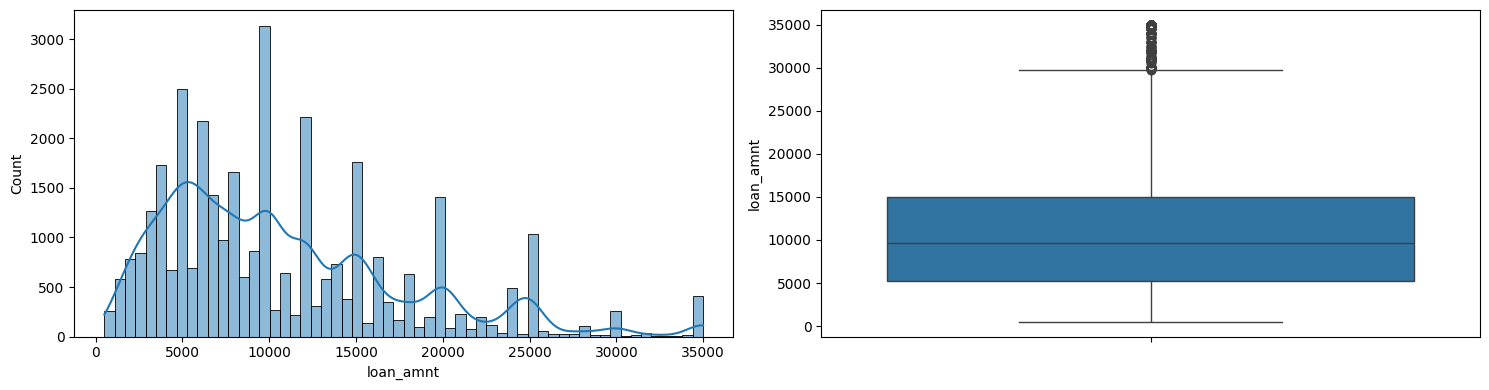

In [1107]:
fig, axis = plt.subplots(figsize=(15, 4), ncols=2)

sns.histplot(ax=axis[0], data=lend['loan_amnt'], kde=True)
sns.boxplot(ax=axis[1], data=lend['loan_amnt'])

plt.tight_layout()
plt.show()

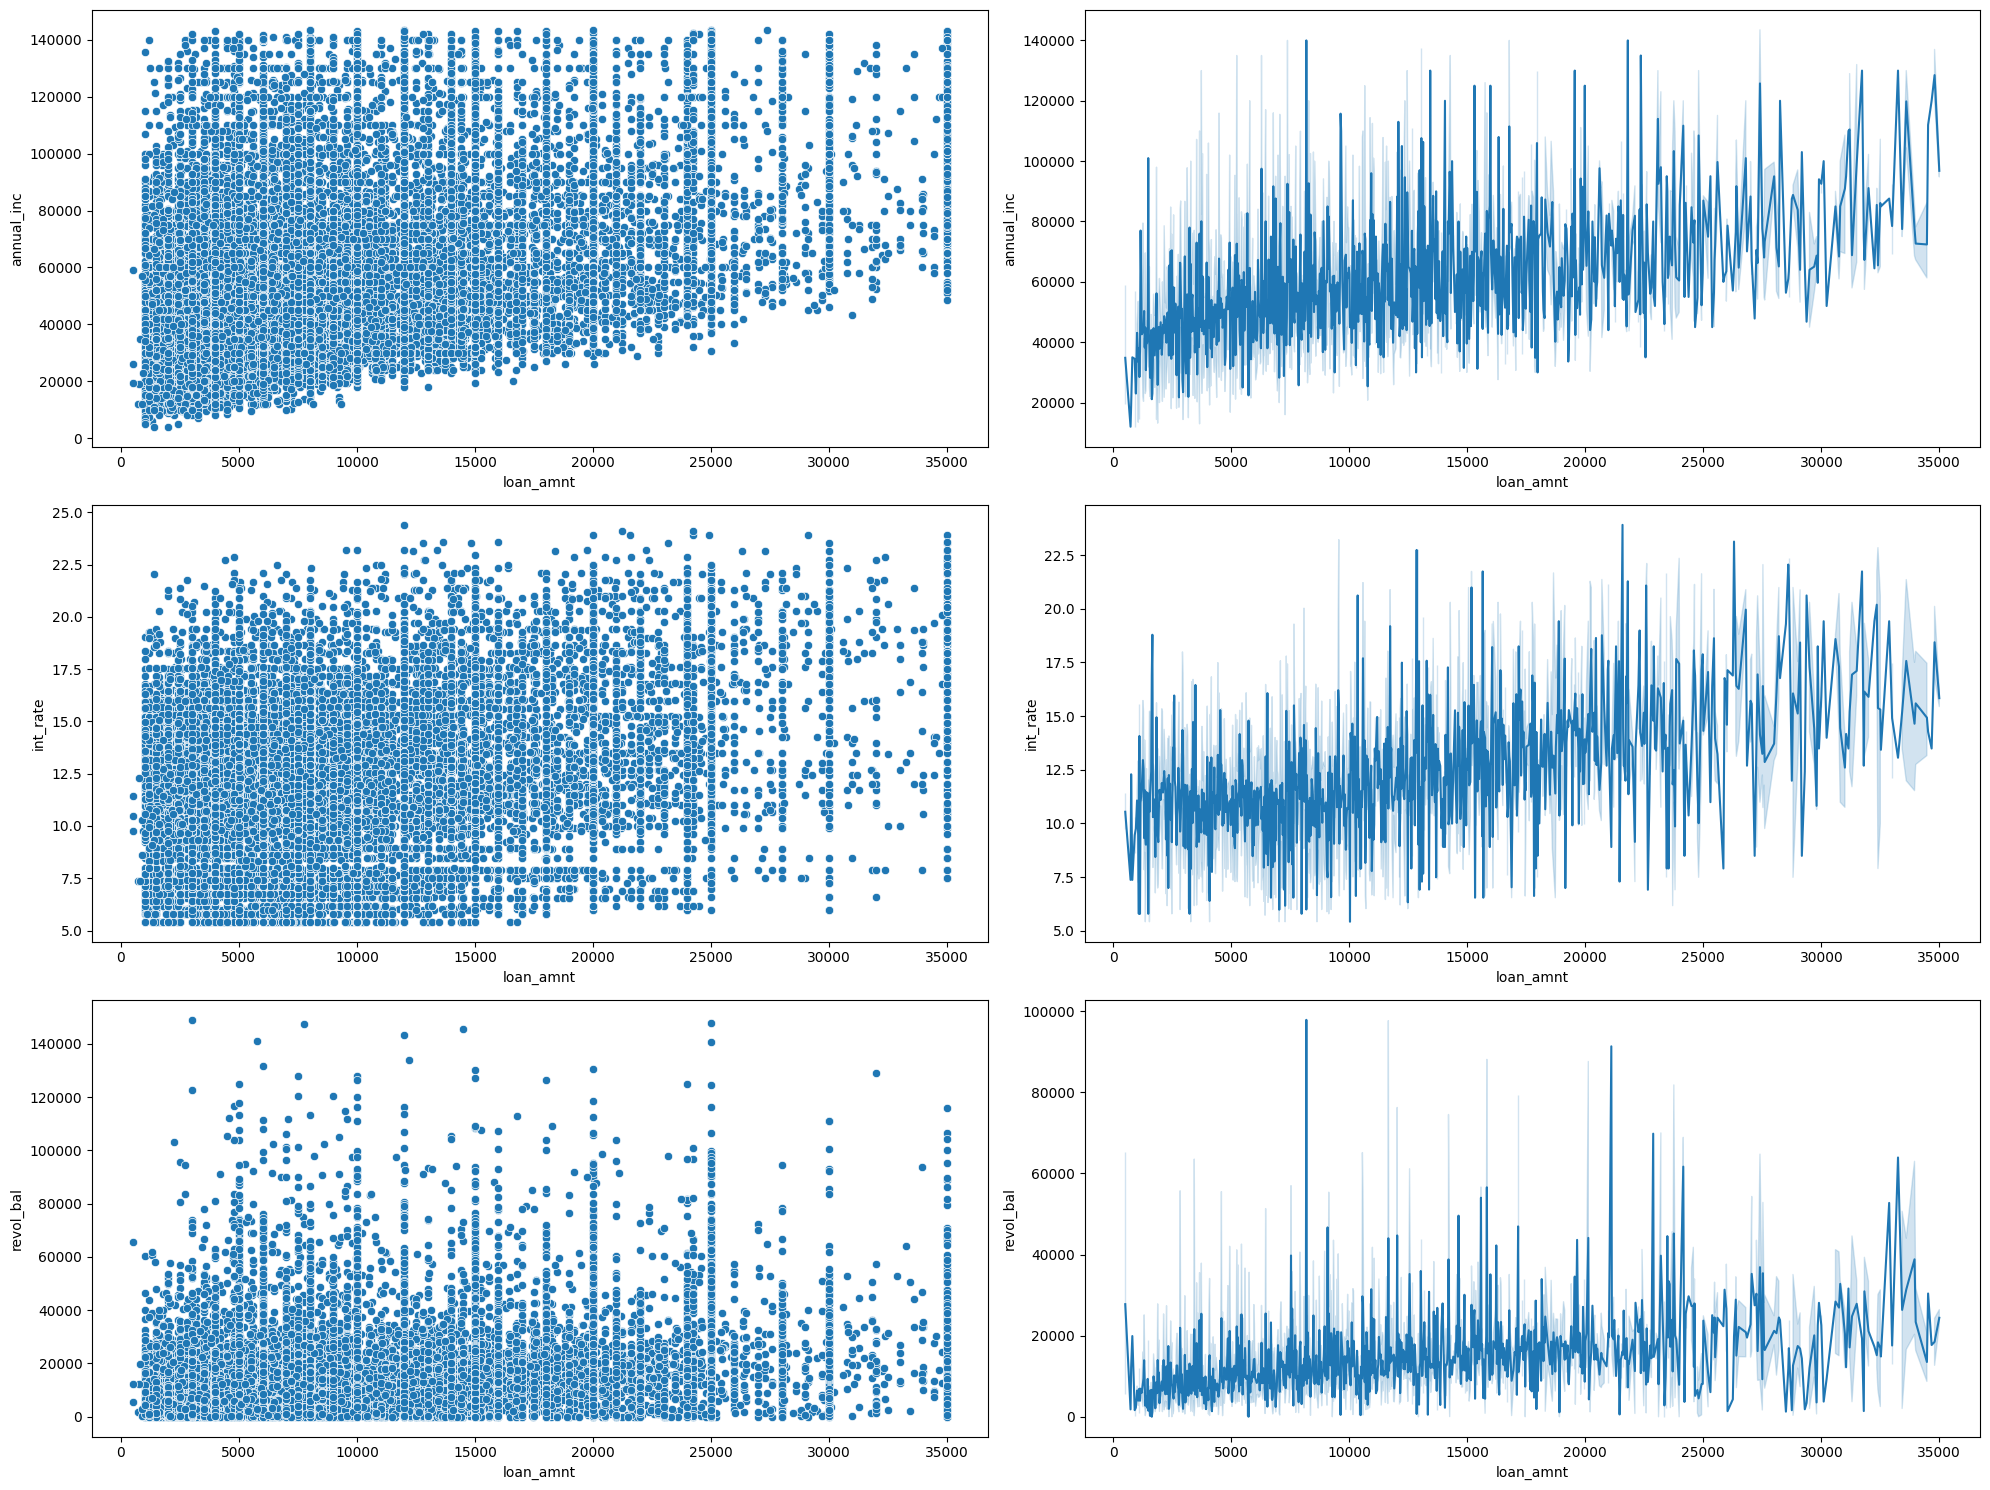

In [1242]:
fig, axis = plt.subplots(3,2, figsize=(20,15))

# sns.histplot(ax=axis[0,0], data=lend, x='loan_amnt')
sns.scatterplot(ax=axis[0,0], data=lend, x='loan_amnt', y='annual_inc')
sns.lineplot(ax=axis[0,1], data=lend, x='loan_amnt', y='annual_inc')

# sns.kdeplot(ax=axis[1,0], data=lend, x='loan_amnt')
sns.scatterplot(ax=axis[1,0], data=lend, x='loan_amnt', y='int_rate')
sns.lineplot(ax=axis[1,1], data=lend, x='loan_amnt', y='int_rate')

# sns.boxplot(ax=axis[2,0], data=lend, x='loan_amnt')
sns.scatterplot(ax=axis[2,0], data=lend, x='loan_amnt', y='revol_bal')
sns.lineplot(ax=axis[2,1], data=lend, x='loan_amnt', y='revol_bal')

plt.tight_layout()
plt.show()

In [1151]:
# Amount available for loan increases with increase in annual income
# Customers tend to take loans mostly in round figures throughout all salary ranges
# There is a high density of customers taking loans from Rs.3000 till 15000 (approx)
# Above 15000, number of customers taking loans gradually reduces till 28000 (approx)
# Revolving balance increases with loan as a general trend but most customers taking higher loans tend to keep it low
# Loan amount and revolving balance have low positive correlation

In [1171]:
amt_status = pd.crosstab(lend['loan_amnt'], lend['loan_status']).sort_values('loan_amnt', ascending=False)
amt_status[amt_status['Charged Off'] > 0]

loan_status,Charged Off,Fully Paid
loan_amnt,,
35000,118,285
34475,1,4
34000,2,5
33950,1,5
33425,1,1
...,...,...
1200,19,100
1100,1,2
1050,1,3


In [1289]:
term_status = pd.crosstab(index=lend['term'], columns=lend['loan_status']) # , normalize=True) * 100
term_status['Def_%'] = term_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
term_status

loan_status,Charged Off,Fully Paid,Def_%
term,,,
36 months,2790,23105,10.77
60 months,2145,6366,25.20


In [1500]:
## Loan - Term
# Customers favour taking loans with lower payback period as 75% of customers prefer 36 month period
# There is a approx 15% increase in Charge off customers with increase in payback term
# While 10% defaulted in 36 month period, more than 25% defaulted in 60 month period

In [1211]:
pd.crosstab(index=lend['int_rate'], columns=lend['loan_status'])

loan_status,Charged Off,Fully Paid
int_rate,,
5.42,13,474
5.79,13,355
5.99,18,285
6.00,0,16
6.03,5,381
...,...,...
23.52,4,1
23.59,1,2
23.91,1,5


In [1237]:
int_status = pd.crosstab(index=lend['int_rate'], columns=lend['loan_status']).reset_index()
int_status.head()

loan_status,int_rate,Charged Off,Fully Paid
0,5.42,13,474
1,5.79,13,355
2,5.99,18,285
3,6.00,0,16
4,6.03,5,381


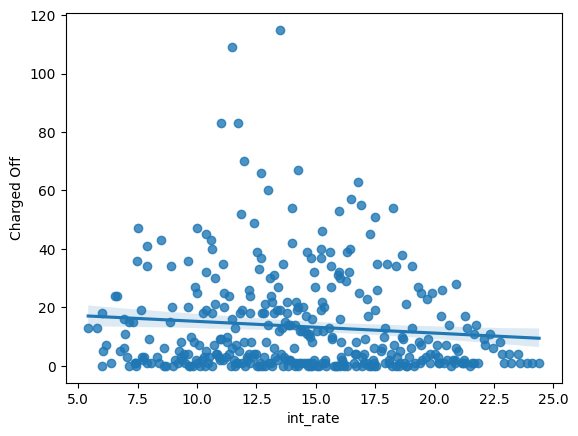

In [1240]:
sns.regplot(int_status, x='int_rate', y='Charged Off')
plt.show()

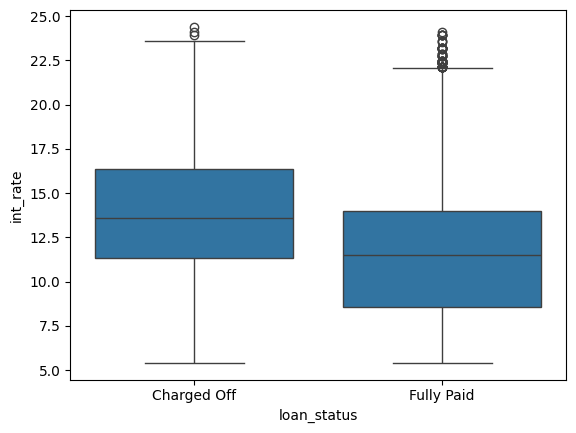

In [1239]:
sns.boxplot(data=lend, y='int_rate', x='loan_status')
plt.show()

In [1248]:
# Default customers decrease with increase in interest rate as general trend
# Most defaulters are from 10% to 17% interest rate which corresponds to maximum number of customers in that range
# Customers being charged lower interest rate tend to pay more often
#   which may be because of less interest on principle being added ==> Less burden for customer
# 75% of the customers who pay are below 15% interest rate

In [1258]:
#####################
#Higher interest rates ==> They know what they are getting into
#Lower interest rate ==> They can easily pay the money back
#10% - 17% range ==> Probably taking money (more money may be) and getting trapped unable to pay
##   ????????????????????????????????????????

In [1249]:
lend.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_mon', 'issue_yr', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [1295]:
lend['emp_length'].value_counts()

emp_length
10+ yrs    7637
2 yrs      4002
0 yrs      3971
3 yrs      3725
4 yrs      3128
5 yrs      2948
1 yrs      2946
6 yrs      2013
7 yrs      1599
8 yrs      1306
9 yrs      1131
Name: count, dtype: int64

In [1290]:
emp_status = pd.crosstab(index=lend['emp_length'], columns=lend['loan_status'])
emp_status['Def_%'] = emp_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)

In [1313]:
emp_status = emp_status.sort_values('Charged Off', ascending=False)
emp_status

loan_status,Charged Off,Fully Paid,Def_%
emp_length,,,
10+ yrs,1218,6419,15.95
0 yrs,540,3431,13.60
2 yrs,529,3473,13.22
3 yrs,516,3209,13.85
4 yrs,428,2700,13.68
1 yrs,425,2521,14.43
5 yrs,419,2529,14.21
6 yrs,282,1731,14.01
7 yrs,245,1354,15.32


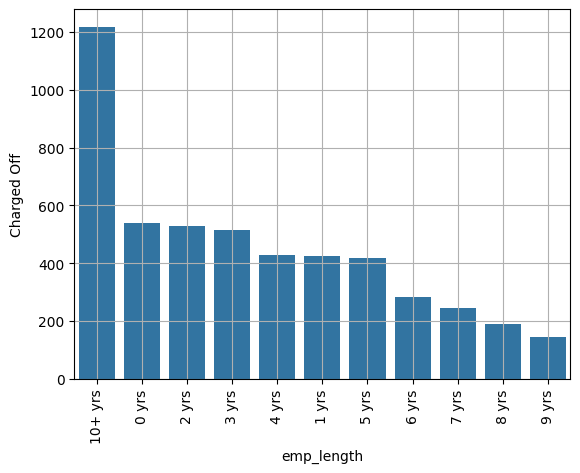

In [1315]:
sns.barplot(emp_status, x='emp_length', y='Charged Off')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [1316]:
## Employee Length vs Loan Status
# Percentage of defaulters increases from 0 yrs till 8 yrs, then explodes to 16% with 10+ years
# Low defaulters rate at 9 yrs period may be due to considerable decrease in people seeking loans
# Number of customers taking loans at 10+ yrs has doubled that of the next highest ==> 
# more customers tend to take loans after 10 yrs in job which also has increased the number of defaulters

In [1319]:
# What is the amount, interest and terms they prefer at 10+yrs ==> find for others as well
#  ???????????????????????????????????

In [1462]:
hme_status = pd.crosstab(index=lend['home_ownership'], columns=lend['loan_status'])
hme_status['Def_%'] = hme_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
hme_status = hme_status.reset_index()
hme_status

loan_status,home_ownership,Charged Off,Fully Paid,Def_%
0,MORTGAGE,2001,12769,13.55
1,OTHER,17,72,19.10
2,OWN,356,2127,14.34
3,RENT,2561,14503,15.01


sns.countplot(data=lend, x='home_ownership', hue='loan_status')
plt.show()

sns.countplot(data=lend, x='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

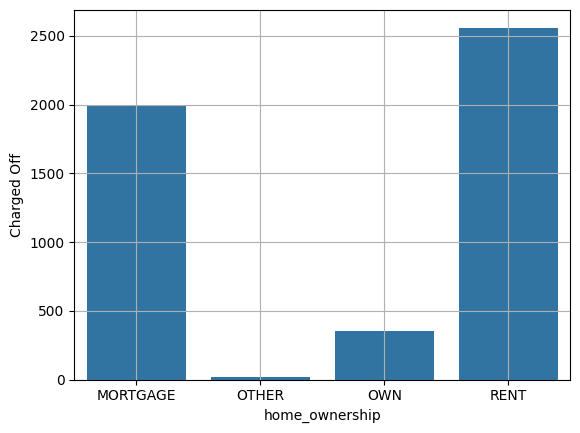

In [1461]:
sns.barplot(hme_status, x='home_ownership', y='Charged Off')
plt.grid()
plt.show()

In [1463]:
## No significant insight into home_ownership influence on default
# Needs insight into how this variable can tap into more customers as defaults are low
# ??????????????????????????????????

In [1480]:
dti_status = pd.crosstab(index=lend['dti'], columns=lend['loan_status'])
dti_status['Def_%'] = dti_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
dti_status = dti_status.reset_index()
dti_status

loan_status,dti,Charged Off,Fully Paid,Def_%
0,0.00,23,125,15.54
1,0.01,1,0,100.00
2,0.02,0,5,0.00
3,0.03,0,1,0.00
4,0.04,0,3,0.00
...,...,...,...,...
2832,29.88,0,1,0.00
2833,29.89,0,1,0.00
2834,29.92,0,1,0.00
2835,29.93,0,3,0.00


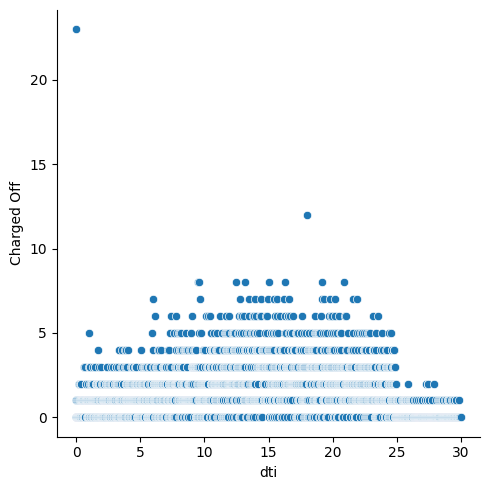

In [1491]:
sns.relplot(dti_status, x='dti', y='Charged Off')
plt.show()

In [1477]:
## Debt to Income Ratio
# debt to income ratio has no effect on loan defaults

In [1494]:
prupose_status = pd.crosstab(index=lend['purpose'], columns=lend['loan_status'])
prupose_status['Def_%'] = prupose_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
prupose_status = prupose_status.reset_index()
prbupose_status.sort_values('Charged Off', ascending=False, inplace=True)
prupose_status

loan_status,purpose,Charged Off,Fully Paid,Def_%
2,debt_consolidation,2507,14041,15.15
9,other,544,2872,15.93
1,credit_card,467,4031,10.38
11,small_business,360,951,27.46
4,home_improvement,286,2104,11.97
6,major_purchase,194,1713,10.17
0,car,150,1216,10.98
7,medical,94,501,15.80
13,wedding,90,771,10.45
8,moving,80,428,15.75


In [1495]:
prupose_status.sort_values('Def_%', ascending=False, inplace=True)
prupose_status

loan_status,purpose,Charged Off,Fully Paid,Def_%
11,small_business,360,951,27.46
10,renewable_energy,15,66,18.52
3,educational,49,236,17.19
5,house,51,262,16.29
9,other,544,2872,15.93
7,medical,94,501,15.80
8,moving,80,428,15.75
2,debt_consolidation,2507,14041,15.15
12,vacation,48,279,14.68
4,home_improvement,286,2104,11.97


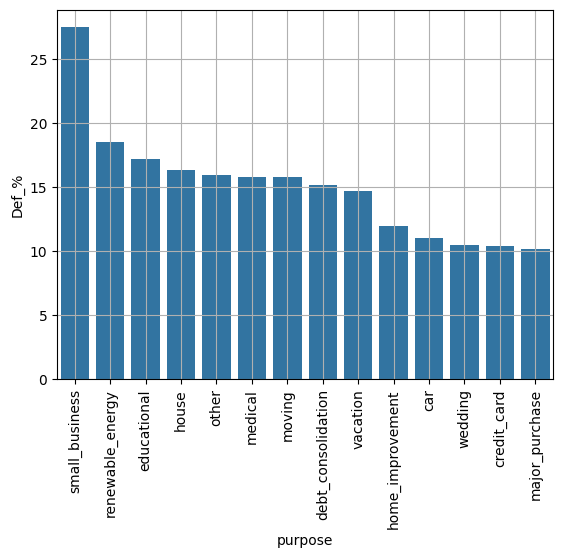

In [1498]:
sns.barplot(prupose_status, x='purpose', y='Def_%')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [1525]:
## Purpose vs Loan Status
# Customers taking loans for small businesses have defaulted the most at 27%
# Renewable energy defaults are high at 19% although the number of customers is very low indicating high risk


In [1529]:
grade_status = pd.crosstab(index=lend['grade'], columns=lend['loan_status'])
grade_status['Def_%'] = grade_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
grade_status = grade_status.reset_index()
grade_status.sort_values('Def_%', ascending=False, inplace=True, ignore_index=True)
grade_status

loan_status,grade,Charged Off,Fully Paid,Def_%
0,G,89,163,35.32
1,F,265,571,31.70
2,E,615,1704,26.52
3,D,994,3576,21.75
4,C,1203,5860,17.03
5,B,1252,9187,11.99
6,A,517,8410,5.79


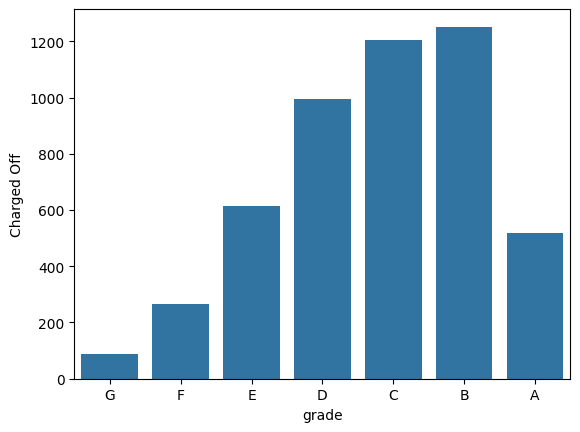

In [1523]:
sns.barplot(grade_status,x='grade', y='Charged Off')
plt.show()

In [1526]:
## Grades vs Loan Status
# Majority of the losses come from B,C,D graded customers who constitute 78% of the defaulters
# Majority of the customers from E and G default with G being highest % but the total number of loans given is considerably low

In [1527]:
lend.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_mon', 'issue_yr', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [1553]:
ttl_status = lend.groupby(['loan_status', 'emp_title']).agg('size').reset_index(name='ecount')
ttl_status.sort_values('ecount',  ascending=False, inplace=True)
ttl_status[ttl_status['loan_status'] == 'Charged Off'].head()

,loan_status,emp_title,ecount
354,Charged Off,Bank of America,20
3432,Charged Off,US Army,18
3632,Charged Off,Walmart,14
86,Charged Off,AT&T,12
3425,Charged Off,UPS,12


In [1531]:
## Employee Title vs Loan Status

In [1556]:
lend.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_mon', 'issue_yr', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [1561]:
yr_status = pd.crosstab(index=lend['issue_yr'], columns=lend['loan_status'])
yr_status['Def_%'] = yr_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
yr_status = yr_status.reset_index()
yr_status.sort_values('issue_yr', ascending=False, inplace=True, ignore_index=True)
yr_status

loan_status,issue_yr,Charged Off,Fully Paid,Def_%
0,2011,2872,15307,15.80
1,2010,1277,9085,12.32
2,2009,527,3711,12.44
3,2008,221,1198,15.57
4,2007,38,170,18.27


In [1563]:
mn_status = pd.crosstab(index=lend['issue_mon'], columns=lend['loan_status'])
mn_status['Def_%'] = mn_status.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
mn_status = mn_status.reset_index()
mn_status.sort_values('issue_mon', ascending=False, inplace=True, ignore_index=True)
mn_status

loan_status,issue_mon,Charged Off,Fully Paid,Def_%
0,12,600,3142,16.03
1,11,518,3039,14.56
2,10,498,2788,15.16
3,9,492,2621,15.80
4,8,421,2645,13.73
5,7,422,2593,14.00
6,6,415,2418,14.65
7,5,416,2222,15.77
8,4,335,2227,13.08
9,3,301,2093,12.57


In [1578]:
yrmn = lend.groupby(['issue_yr', 'issue_mon', 'loan_status']).size().reset_index(name='yrcount')
yrmn.sort_values(by=['issue_yr', 'issue_mon'], ascending=False)
yrmn[yrmn['issue_yr'] == 2008]

,issue_yr,issue_mon,loan_status,yrcount
12,2008,1,Charged Off,28
13,2008,1,Fully Paid,128
14,2008,2,Charged Off,25
15,2008,2,Fully Paid,137
16,2008,3,Charged Off,34
17,2008,3,Fully Paid,178
18,2008,4,Charged Off,23
19,2008,4,Fully Paid,114
20,2008,5,Charged Off,10
21,2008,5,Fully Paid,58


In [1579]:
# No specific Trends with regards to Year and Month